# Empirical f factor determination for the Cut Face Sandstone

This notebook implements common mean tests between the detrital remanent magnetization (DRM) 'ht' component of the Cutface Creek Sandstone and directions for pigmentary hematite 'mt' and the North Shore volcanic group for progressively applied f factors to the DRM directions. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm
import math as math

%config InlineBackend.figure_format = 'retina'

## Import Cut Face specimen directions

From the MagIC file we import the fits to the Cut Face specimen data and filter them by 'mt' and 'ht' tilt corrected data. We then calculate their means.

In [2]:
Cutface_specimens = pd.read_csv('../data/Pmag/cutface/specimens.txt', sep='\t', header=1)
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [3]:
mt_directions_block=ipmag.make_di_block(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
ht_directions_block=ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())

spec_ht_inc=specimens_ht_tc['dir_inc'].tolist()
spec_ht_dec=specimens_ht_tc['dir_dec'].tolist()

In [4]:
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_mt

{'dec': 286.49699313337345,
 'inc': 42.003560540334476,
 'n': 167,
 'r': 163.55867702232504,
 'k': 48.23726255190197,
 'alpha95': 1.5861242493209464,
 'csd': 11.662554654251615}

In [5]:
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 286.57662835036626,
 'inc': 29.430252935780295,
 'n': 157,
 'r': 152.63958083558612,
 'k': 35.77637702199419,
 'alpha95': 1.9070660543868,
 'csd': 13.542125665843008}

## Load North Shore Volcanic Group site level paleodirection data

We follow the compilation of Swanson-Hysell et al., 2019 in combining data from study of Tauxe et al. 2009 and Books 1972 for the upper northeast sequence of the North Shore Volcanic Group. The code in the cell below comes from the Keweenawan_Track.ipynb notebook of https://github.com/Swanson-Hysell-Group/2019_Midcontinent_Rift

In [6]:
NSVG_Data=pd.read_csv('../data/data_Compiled/Tauxe2009/pmag_results.txt',sep='\t',skiprows=1)
nneu_site_list = ['ns002',
                  'ns003',
                  'ns004',
                  'ns005',
                  'ns016',
                  'ns018',
                  'ns019',
                  'ns020',
                  'ns021',
                  'ns022',
                  'ns023',
                  'ns028',
                  'ns030',
                  'ns031',
                  'ns032']
nneu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nneu_site_list)]
Books1972_sites = pd.read_csv('../data/data_compiled/Books1972/sites.txt',sep='\t',header=1)
Books1972_MN_sites = Books1972_sites[Books1972_sites.location == 'North Shore Volcanic Group:Minnesota']
nneu_nmil_sites_B72 = ['NS269','NS378','NS227']
nneu_nkcr_sites_B72 = ['NS229','NS375']
nneu_nrcb_sites_B72 = ['NS226']
nneu_ncvb_sites_B72 = ['NS362','NS365']
nneu_ngha_sites_B72 = ['NS367','NS265']
nneu_ntpb_sites_B72 = ['NS368',
                       'NS369',
                       'NS374',
                       'NS376',
                       'NS377',
                       'NS169',
                       'NS170',
                       'NS171']
nneu_norl_sites_B72 = ['NS370',
                       'NS371',
                       'NS372']
nneu_B72_site_list = nneu_nmil_sites_B72 + nneu_nkcr_sites_B72 + nneu_nrcb_sites_B72 + nneu_ncvb_sites_B72 + nneu_ngha_sites_B72 + nneu_norl_sites_B72 
nneu_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nneu_B72_site_list)]
nneu_combined_dir_dec = nneu_data_B72.dir_dec.tolist() + nneu_data.average_dec.tolist()
nneu_combined_dir_inc = nneu_data_B72.dir_inc.tolist() + nneu_data.average_inc.tolist()

The directional data from these sites can be used to calculate an overall mean. 

In [7]:
nneu_dir_mean=ipmag.fisher_mean(nneu_combined_dir_dec,
                                nneu_combined_dir_inc)
nneu_dir_mean

{'dec': 291.3242830230793,
 'inc': 40.25007073978004,
 'n': 28,
 'r': 27.15979233643242,
 'k': 32.134912796862814,
 'alpha95': 4.883450101163713,
 'csd': 14.288822983259386}

However, given that these data were developed from sites at different locations, they should be transformed to be at a common location of the Cut Face locality. To do this, we can take the VGPs from the sites and use the `pmag.vpg_di` function to transform them to declinations and inclinations at the Cut Face section. This does not make a large difference, but is the correct approach.

In [8]:
nneu_combined_vgp_lon = nneu_data_B72.vgp_lon.tolist() + nneu_data.vgp_lon.tolist()
nneu_combined_vgp_lat = nneu_data_B72.vgp_lat.tolist() + nneu_data.vgp_lat.tolist()

nneu_VGPs = ipmag.make_di_block(nneu_combined_vgp_lon,
                                nneu_combined_vgp_lat)
nneu_mean=pmag.fisher_mean(nneu_VGPs)
ipmag.print_pole_mean(nneu_mean)

Plon: 181.7  Plat: 31.1
Number of directions in mean (n): 28
Angular radius of 95% confidence (A_95): 4.2
Precision parameter (k) estimate: 42.2


In [9]:
Cut_Face_lon = -90.44128
Cut_Face_lat = 47.73055

nneu_dec_at_CF = []
nneu_inc_at_CF = []

for n in range(0,len(nneu_combined_vgp_lon)):
    di_tuple = pmag.vgp_di(nneu_combined_vgp_lat[n],
                           nneu_combined_vgp_lon[n],
                           Cut_Face_lat,
                           Cut_Face_lon)
    nneu_dec_at_CF.append(di_tuple[0])
    nneu_inc_at_CF.append(di_tuple[1])
    
nneu_dir_at_CF_mean=ipmag.fisher_mean(nneu_dec_at_CF,
                                      nneu_inc_at_CF)
nneu_dir_at_CF_mean

{'dec': 291.2520666319885,
 'inc': 40.329538870827285,
 'n': 28,
 'r': 27.167632766747904,
 'k': 32.43760556804931,
 'alpha95': 4.859896063610683,
 'csd': 14.221998371546082}

However, the best estimate of the expected direction at Cutface Creek should come from converting the volcanic mean pole position to direction rather than the mean of the volcanics in directional space.

In [10]:
pmag.vgp_di(nneu_mean['inc'],nneu_mean['dec'],Cut_Face_lat,Cut_Face_lon)

(290.66292912267966, 41.436690497945015)

## Common mean test for CF-MT vs CF-HT (with f factors ranging from 0.1 to 1.0)

Here we conduct common mean test between the mid-temperature component and the high-temperature component of Cut Face directions. This method is for empirically deriving the f factor by interating through a range of values for f to unsquish the high-temperature component of specimen directions and use the Watson common mean test for judging whether the resulting directions share a common mean with the mid-temperature directions which are interpreted to be CRMs and do not suffer from inclination shallowing.

The code cell below calculates the angle between the mean of the 'mt' directions and the mean of the 'ht' directions as they are progressively unsquished.

In [11]:
all_f_factors_mt = np.arange(0.1,1.0,.001)
all_angles_mt = []

mt_fisher_mean = ipmag.fisher_mean(di_block = mt_directions_block)

for f_factor in all_f_factors_mt:

    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_factor)

    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    ht_unsquished_fisher_mean = ipmag.fisher_mean(di_block = ht_unsquished_directions_block)

    angle =  pmag.angle((ht_unsquished_fisher_mean['dec'],ht_unsquished_fisher_mean['inc']),
                   (mt_fisher_mean['dec'],mt_fisher_mean['inc']))

    all_angles_mt.append(angle)

This code cell zooms in on the range where the angle is getting small in order to conduct common mean tests. Because common mean tests implement a resampling algorithm, this code cell takes a long time to run. The critical angle that is the threshold for the test changes as a function of the unsquishing of the data. Finding the critical angle requires a large number of simulations.

**If the three cells below have been run already, skip running them and import the saved csv**

In [12]:
%%time
common_mean_f_factors = np.arange(0.54,0.68,.001)
angles_mt = []
critical_angles = []
common_mean_result = []

for f_factor in common_mean_f_factors:
    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_factor)
    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(ht_unsquished_directions_block, 
                                                  mt_directions_block,
                                                  NumSims=5000,
                                                  print_result=False)
    critical_angles.append(watson_common_mean[2])
    angles_mt.append(watson_common_mean[1])
    if watson_common_mean[0] == 1:
        common_mean_result.append('pass')
    elif watson_common_mean[0] == 0:
        common_mean_result.append('fail')

Wall time: 1h 17min 36s


In [13]:
common_mean_mt = pd.DataFrame({'f_factors':common_mean_f_factors,
                               'angles':angles_mt,
                               'critical_angles':critical_angles,
                               'result':common_mean_result})

In [14]:
# common_mean_mt.to_csv('./code_output/common_mean_mt.csv',index=0)
common_mean_mt.head()

,f_factors,angles,critical_angles,result
0,0.540,3.100433,2.545167,fail
1,0.541,3.051402,2.517951,fail
2,0.542,3.002459,2.457671,fail
3,0.543,2.953605,2.559907,fail
4,0.544,2.904839,2.474164,fail


**If the three cells above have been run already, skip running them and import the saved csv**

In [12]:
common_mean_mt = pd.read_csv('./code_output/common_mean_mt.csv')

index_angle_mt=np.argmin(common_mean_mt['angles'])
best_angle_mt = round(common_mean_mt['angles'][index_angle_mt], 2)
best_f_mt = round(common_mean_mt['f_factors'][index_angle_mt], 2)

print('The smallest angle between data sets is',round(best_angle_mt,2), 'which corresponds to an f factor of', best_f_mt)

The smallest angle between data sets is 0.01 which corresponds to an f factor of 0.61


In [13]:
common_mean_mt_pass = common_mean_mt[common_mean_mt['result']=='pass']
common_mean_mt_pass.reset_index(inplace=True)
common_mean_mt_pass.head()

,index,f_factors,angles,critical_angles,result
0,12,0.552,2.517859,2.539750,pass
1,13,0.553,2.469877,2.594076,pass
2,14,0.554,2.421981,2.597594,pass
3,15,0.555,2.374172,2.533047,pass
4,16,0.556,2.326448,2.536840,pass


In [14]:
common_mean_mt_f_low = common_mean_mt_pass['f_factors'].min()
common_mean_mt_f_high = common_mean_mt_pass['f_factors'].max()

print('The optimal f factor is:', round(best_f_mt,2),
      'with the lowest f of:', round(common_mean_mt_f_low,2),
       'and the highest f of:', round(common_mean_mt_f_high,2))

The optimal f factor is: 0.61 with the lowest f of: 0.55 and the highest f of: 0.67


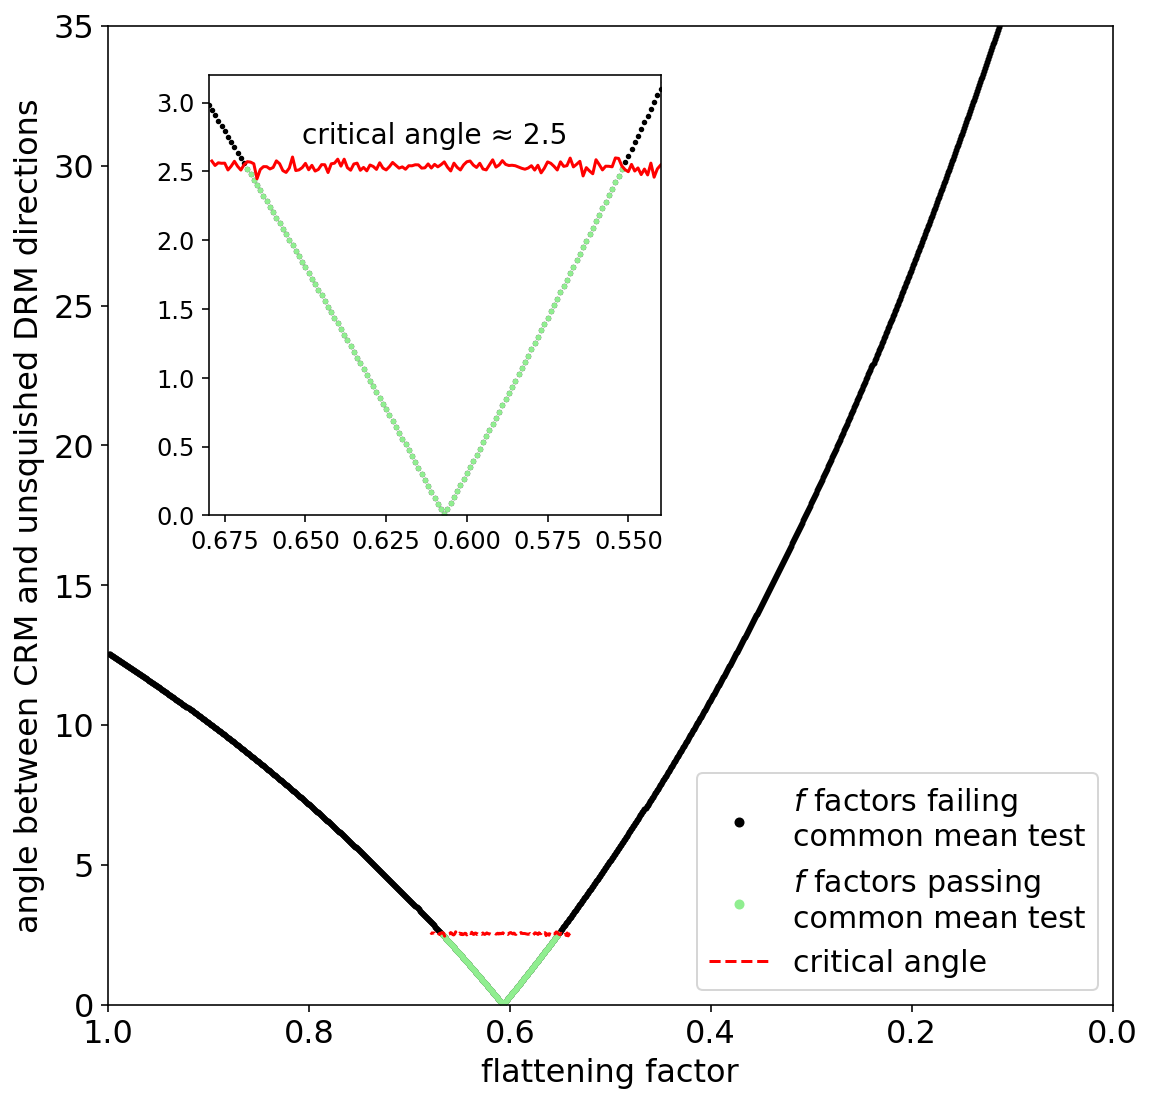

In [15]:
fig,inset = plt.subplots(figsize=(9,9))
inset.scatter(all_f_factors_mt,all_angles_mt,s=4,color='black',
             label='$f$ factors failing\ncommon mean test')
inset.scatter(common_mean_mt_pass['f_factors'],
              common_mean_mt_pass['angles'],
              s=4,color='lightgreen',label='$f$ factors passing\ncommon mean test')
inset.plot(common_mean_mt['f_factors'],
           common_mean_mt['critical_angles'],
           color='red',ls='--',label='critical angle')
inset.legend(loc='lower right',fontsize=15,markerscale=2)

fig_inset=inset.inset_axes([.1,.5,.45,.45])
fig_inset.scatter(all_f_factors_mt,all_angles_mt,s=3,color='black')
fig_inset.scatter(common_mean_mt_pass['f_factors'],common_mean_mt_pass['angles'],s=3,color='lightgreen')
fig_inset.tick_params(labelsize=12)
fig_inset.invert_xaxis()
fig_inset.plot(common_mean_mt['f_factors'],common_mean_mt['critical_angles'],
               color='red',ls='-',label='critical angle')
fig_inset.text(0.61, 2.7, 'critical angle ≈ '+str(round(np.mean(common_mean_mt['critical_angles']), 1)), 
               fontsize=14, horizontalalignment='center')
fig_inset.set_xlim(.68,.54)
fig_inset.set_ylim(0,3.2)

plt.xlabel('flattening factor',fontsize=16)
plt.ylabel('angle between CRM and unsquished DRM directions',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1,0)
plt.ylim(0,35)

plt.savefig('code_output/angle_vs_f_MT.pdf',bbox_inches='tight',transparent=True)

plt.show()

## Common mean test for NSVG vs CF-HT (with f factors ranging from 0.1 to 1)

Here we conduct common mean test between the NSVG northeast sequence lava directions (calculated to be the expected directions at Cut Face) and the high-temperature component of Cut Face directions. This method is for empirically deriving the f factor by interating through a range of values for f to unsquish the high-temperature component of specimen directions and use the Watson common mean test for judging whether the resulting directions share a common mean with the NSVG directions which do not suffer from inclination shallowing.

The code cell below calculates the angle between the mean of the 'nneu' directions and the mean of the 'ht' directions as they are progressively unsquished.

In [16]:
nneu_dir_at_CF_block=ipmag.make_di_block(nneu_dec_at_CF,
                                      nneu_inc_at_CF)

In [17]:
all_f_factors_nneu = np.arange(0.1,1.0,.001)
all_angles_nneu = []

for f_factor in all_f_factors_mt:

    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_factor)

    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    ht_unsquished_fisher_mean = ipmag.fisher_mean(di_block = ht_unsquished_directions_block)

    angle =  pmag.angle((ht_unsquished_fisher_mean['dec'],ht_unsquished_fisher_mean['inc']),
                   (nneu_dir_at_CF_mean['dec'],nneu_dir_at_CF_mean['inc']))

    all_angles_nneu.append(angle)

This code cell zooms in on the range where the angle is getting small in order to conduct common mean tests. Because common mean tests implement a resampling algorithm, this code cell takes a long time to run. The critical angle that is the threshold for the test changes as a function of the unsquishing of the data. Finding the critical angle requires a large number of simulations.

**If the three cells below have been run already, skip running them and import the saved csv**

In [29]:
%%time
common_mean_f_factors_nneu = np.arange(0.5,0.8,.001)
angles_nneu = []
critical_angles_nneu = []
common_mean_result_nneu = []

for f_factor in common_mean_f_factors_nneu:
    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_factor)
    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(ht_unsquished_directions_block, 
                                                  nneu_dir_at_CF_block,
                                                  NumSims=5000,
                                                  print_result=False)
    critical_angles_nneu.append(watson_common_mean[2])
    angles_nneu.append(watson_common_mean[1])
    if watson_common_mean[0] == 1:
        common_mean_result_nneu.append('pass')
    elif watson_common_mean[0] == 0:
        common_mean_result_nneu.append('fail')

Wall time: 1h 36min 51s


In [32]:
common_mean_nneu = pd.DataFrame({'f_factors':common_mean_f_factors_nneu,
                               'angles':angles_nneu,
                               'critical_angles':critical_angles_nneu,
                               'result':common_mean_result_nneu})

In [34]:
common_mean_nneu.to_csv('./code_output/common_mean_nneu.csv',index=0)
common_mean_nneu.head()

,f_factors,angles,critical_angles,result
0,0.500,7.643924,5.215435,fail
1,0.501,7.597590,5.223397,fail
2,0.502,7.551424,5.157791,fail
3,0.503,7.505427,5.152676,fail
4,0.504,7.459599,5.177210,fail


**If the three cells above have been run already, skip running them and import the saved csv**

In [18]:
common_mean_nneu = pd.read_csv('./code_output/common_mean_nneu.csv')

index_angle_nneu=np.argmin(common_mean_nneu['angles'])
best_angle_nneu = round(common_mean_nneu['angles'][index_angle_nneu], 2)
best_f_nneu = round(common_mean_nneu['f_factors'][index_angle_nneu], 2)

print('The smallest angle between data sets is',round(best_angle_nneu,2), 'which corresponds to an f factor of', best_f_nneu)

The smallest angle between data sets is 3.63 which corresponds to an f factor of 0.65


In [19]:
common_mean_nneu_pass = common_mean_nneu[common_mean_nneu['result']=='pass']
common_mean_nneu_pass.reset_index(inplace=True)
common_mean_nneu_pass.head()

,index,f_factors,angles,critical_angles,result
0,60,0.560,5.203646,5.225162,pass
1,61,0.561,5.169867,5.199535,pass
2,62,0.562,5.136360,5.145365,pass
3,63,0.563,5.103128,5.324226,pass
4,64,0.564,5.070175,5.239973,pass


In [20]:
common_mean_nneu_f_low = common_mean_nneu_pass['f_factors'].min()
common_mean_nneu_f_high = common_mean_nneu_pass['f_factors'].max()

print('The optimal f factor is:', round(best_f_nneu,2),
      'with the lowest f of:', round(common_mean_nneu_f_low,2),
       'and the highest f of:', round(common_mean_nneu_f_high,2))

The optimal f factor is: 0.65 with the lowest f of: 0.56 and the highest f of: 0.75


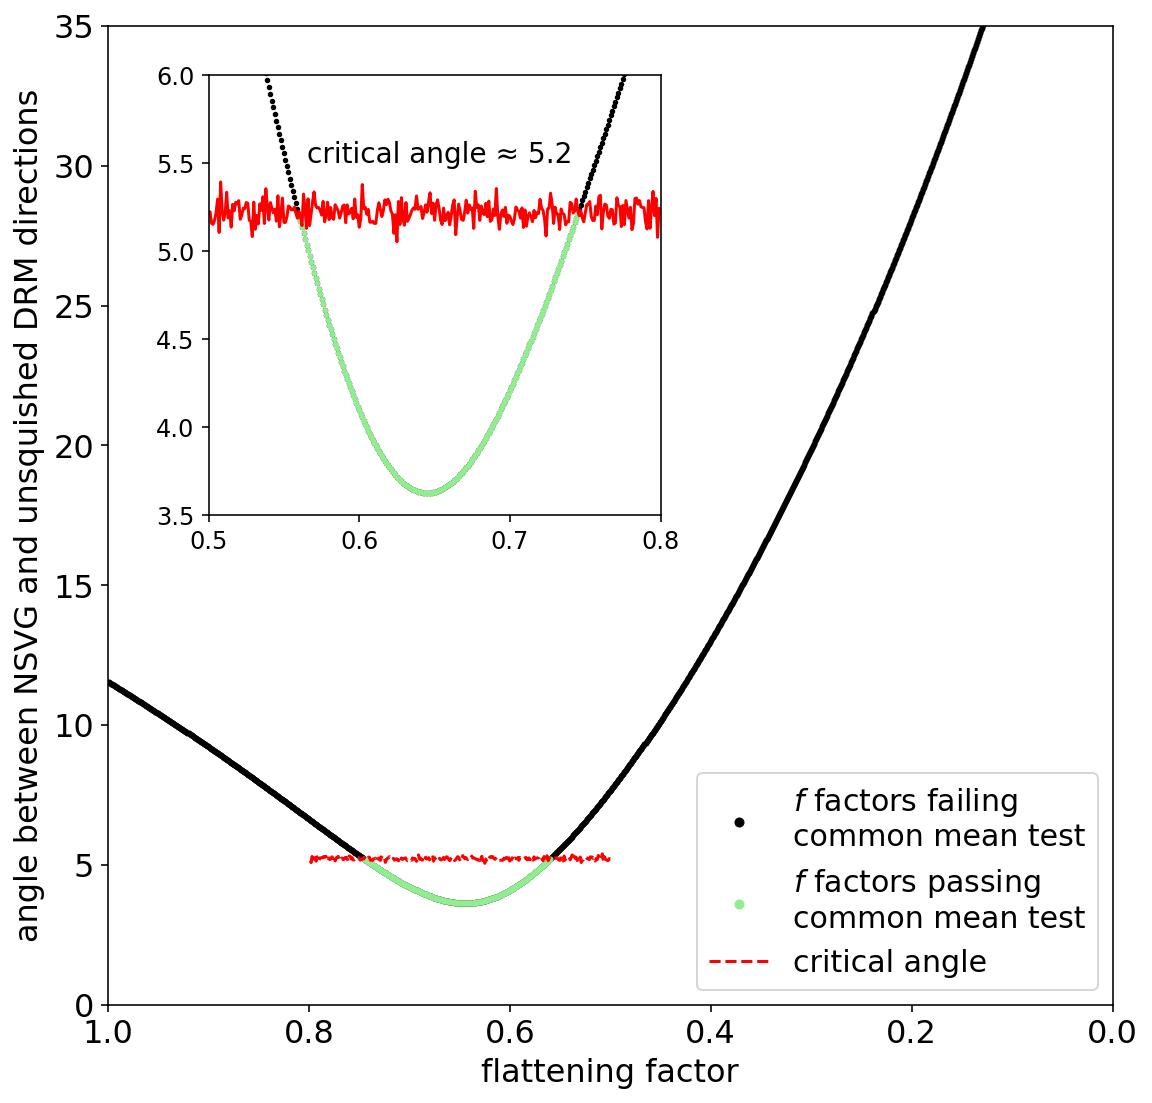

In [21]:
fig,inset = plt.subplots(figsize=(9,9))
inset.scatter(all_f_factors_nneu,all_angles_nneu,s=4,color='black',
             label='$f$ factors failing\ncommon mean test')
inset.scatter(common_mean_nneu_pass['f_factors'],
              common_mean_nneu_pass['angles'],
              s=4,color='lightgreen',label='$f$ factors passing\ncommon mean test')
inset.plot(common_mean_nneu['f_factors'],
           common_mean_nneu['critical_angles'],
           color='red',ls='--',label='critical angle')
inset.legend(loc='lower right',fontsize=15,markerscale=2)

fig_inset=inset.inset_axes([.1,.5,.45,.45])
fig_inset.scatter(all_f_factors_nneu,all_angles_nneu,s=3,color='black')
fig_inset.scatter(common_mean_nneu_pass['f_factors'],common_mean_nneu_pass['angles'],s=3,color='lightgreen')
fig_inset.tick_params(labelsize=12)
fig_inset.invert_xaxis()
fig_inset.plot(common_mean_nneu['f_factors'],common_mean_nneu['critical_angles'],color='red',ls='-',label='critical angle')
fig_inset.text(0.565, 5.5, 'critical angle ≈ '+str(round(np.mean(common_mean_nneu['critical_angles']), 1)), fontsize=14)
fig_inset.set_xlim(.5,.8)
fig_inset.set_ylim(3.5,6)

plt.xlabel('flattening factor',fontsize=16)
plt.ylabel('angle between NSVG and unsquished DRM directions',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1,0)
plt.ylim(0,35)

plt.savefig('./code_output/angle_vs_f_NSVG.pdf',bbox_inches='tight',transparent=True)

plt.show()

## Common mean test on NSVG vs CF-HT for Cut Face Creek Sandstone grouped by grain size

In [22]:
cf_grain_sizes=pd.read_csv('../data/Pmag/cf_specimen_lithologies.csv')
cf_specimens_directions_and_grain=pd.merge(cf_grain_sizes,Cutface_specimens,on='specimen')

In [23]:
cf_fm_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']>=3) & 
                                                  (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                                  (cf_specimens_directions_and_grain['dir_tilt_correction']==100)].reset_index(drop=1)

cf_vfs_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']==2) & 
                                               (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                               (cf_specimens_directions_and_grain['dir_tilt_correction']==100)].reset_index(drop=1)

cf_silt_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']<=1) & 
                                                (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                                (cf_specimens_directions_and_grain['dir_tilt_correction']==100)].reset_index(drop=1)

### Clay and Silt empirical f
Watson common mean test between NSVG and CF claystone/siltstone specimen directions

In [59]:
cf_silt_grain_incs=cf_silt_grain['dir_inc']
cf_silt_grain_decs=cf_silt_grain['dir_dec']

In [60]:
%%time
common_mean_f_factors_silt = np.arange(0.3,0.7,.005)
angles_silt = []
critical_angles_silt = []
common_mean_result_silt = []

for f_factor in common_mean_f_factors_silt:
    silt_unsquished_incs = ipmag.unsquish(cf_silt_grain_incs, f_factor)
    silt_unsquished_directions_block = ipmag.make_di_block(cf_silt_grain_decs,silt_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(silt_unsquished_directions_block, 
                                                  nneu_dir_at_CF_block,
                                                  NumSims=5000,
                                                  print_result=False)
    critical_angles_silt.append(watson_common_mean[2])
    angles_silt.append(watson_common_mean[1])
    if watson_common_mean[0] == 1:
        common_mean_result_silt.append('pass')
    elif watson_common_mean[0] == 0:
        common_mean_result_silt.append('fail')

Wall time: 12min 57s


In [61]:
common_mean_silt = pd.DataFrame({'f_factors':common_mean_f_factors_silt,
                               'angles':angles_silt,
                               'critical_angles':critical_angles_silt,
                               'result':common_mean_result_silt})

In [62]:
common_mean_silt.to_csv('./code_output/common_mean_silt.csv',index=0)
common_mean_silt.head()

,f_factors,angles,critical_angles,result
0,0.300,16.460833,5.570721,fail
1,0.305,16.061634,5.499454,fail
2,0.310,15.667137,5.633427,fail
3,0.315,15.277309,5.478565,fail
4,0.320,14.892120,5.505495,fail


In [24]:
common_mean_silt = pd.read_csv('./code_output/common_mean_silt.csv')
common_mean_silt_pass = common_mean_silt[common_mean_silt['result']=='pass']
common_mean_silt_pass.reset_index(inplace=True)

index_angle = np.argmin(common_mean_silt['angles'])
common_mean_silt_best_angle = round(common_mean_silt['angles'][index_angle], 2)
common_mean_silt_best_f = round(common_mean_silt['f_factors'][index_angle], 2)

print('The smallest angle between data sets is',round(common_mean_silt_best_angle,2), 'which corresponds to an f factor of', common_mean_silt_best_f)

common_mean_silt_f_low = common_mean_silt_pass['f_factors'].min()
common_mean_silt_f_high = common_mean_silt_pass['f_factors'].max()

print('The optimal f factor is:', round(common_mean_silt_best_f,2),
      'with the lowest f of:', round(common_mean_silt_f_low,2),
       'and the highest f of:', round(common_mean_silt_f_high,2))

The smallest angle between data sets is 2.99 which corresponds to an f factor of 0.56
The optimal f factor is: 0.56 with the lowest f of: 0.47 and the highest f of: 0.67


### Very fine sand grain f

Watson common mean test between NSVG and CF very fine sandstone specimen directions

In [63]:
cf_vf_grain_incs=cf_vfs_grain['dir_inc']
cf_vf_grain_decs=cf_vfs_grain['dir_dec']

In [64]:
%%time
common_mean_f_factors_vf = np.arange(0.4,0.8,.005)
angles_vf = []
critical_angles_vf = []
common_mean_result_vf = []

for f_factor in common_mean_f_factors_vf:
    vf_unsquished_incs = ipmag.unsquish(cf_vf_grain_incs, f_factor)
    vf_unsquished_directions_block = ipmag.make_di_block(cf_vf_grain_decs,vf_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(vf_unsquished_directions_block, 
                                                  nneu_dir_at_CF_block,
                                                  NumSims=5000,
                                                  print_result=False)
    critical_angles_vf.append(watson_common_mean[2])
    angles_vf.append(watson_common_mean[1])
    if watson_common_mean[0] == 1:
        common_mean_result_vf.append('pass')
    elif watson_common_mean[0] == 0:
        common_mean_result_vf.append('fail')

Wall time: 10min 27s


In [65]:
common_mean_vf = pd.DataFrame({'f_factors':common_mean_f_factors_vf,
                               'angles':angles_vf,
                               'critical_angles':critical_angles_vf,
                               'result':common_mean_result_vf})

In [66]:
common_mean_vf.to_csv('./code_output/common_mean_vf.csv',index=0)
common_mean_vf.head()

,f_factors,angles,critical_angles,result
0,0.400,13.523458,6.402127,fail
1,0.405,13.224987,6.396933,fail
2,0.410,12.929809,6.367477,fail
3,0.415,12.637927,6.384665,fail
4,0.420,12.349346,6.343328,fail


In [25]:
common_mean_vf = pd.read_csv('./code_output/common_mean_vf.csv')
common_mean_vf_pass = common_mean_vf[common_mean_vf['result']=='pass']
common_mean_vf_pass.reset_index(inplace=True)

index_angle = np.argmin(common_mean_vf['angles'])
common_mean_vf_best_angle = round(common_mean_vf['angles'][index_angle], 2)
common_mean_vf_best_f = round(common_mean_vf['f_factors'][index_angle], 2)

print('The smallest angle between data sets is',round(common_mean_vf_best_angle,2), 'which corresponds to an f factor of', common_mean_vf_best_f)

common_mean_vf_f_low = common_mean_vf_pass['f_factors'].min()
common_mean_vf_f_high = common_mean_vf_pass['f_factors'].max()

print('The optimal f factor is:', round(common_mean_vf_best_f,2),
      'with the lowest f of:', round(common_mean_vf_f_low,2),
       'and the highest f of:', round(common_mean_vf_f_high,2))

The smallest angle between data sets is 3.9 which corresponds to an f factor of 0.66
The optimal f factor is: 0.66 with the lowest f of: 0.55 and the highest f of: 0.79


### fine and medium sand f

Watson common mean test between NSVG and CF fine and medium sandstone specimen directions

In [67]:
cf_fm_grain_incs=cf_fm_grain['dir_inc']
cf_fm_grain_decs=cf_fm_grain['dir_dec']

In [68]:
%%time
common_mean_f_factors_fm = np.arange(0.55,0.9,.005)
angles_fm = []
critical_angles_fm = []
common_mean_result_fm = []

for f_factor in common_mean_f_factors_fm:
    fm_unsquished_incs = ipmag.unsquish(cf_fm_grain_incs, f_factor)
    fm_unsquished_directions_block = ipmag.make_di_block(cf_fm_grain_decs,fm_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(fm_unsquished_directions_block, 
                                                  nneu_dir_at_CF_block,
                                                  NumSims=5000,
                                                  print_result=False)
    critical_angles_fm.append(watson_common_mean[2])
    angles_fm.append(watson_common_mean[1])
    if watson_common_mean[0] == 1:
        common_mean_result_fm.append('pass')
    elif watson_common_mean[0] == 0:
        common_mean_result_fm.append('fail')

Wall time: 10min 50s


In [69]:
common_mean_fm = pd.DataFrame({'f_factors':common_mean_f_factors_fm,
                               'angles':angles_fm,
                               'critical_angles':critical_angles_fm,
                               'result':common_mean_result_fm})

In [70]:
common_mean_fm.to_csv('./code_output/common_mean_fm.csv',index=0)
common_mean_fm.head()

,f_factors,angles,critical_angles,result
0,0.550,8.944027,5.698267,fail
1,0.555,8.731662,5.814232,fail
2,0.560,8.522486,5.643601,fail
3,0.565,8.316561,5.708978,fail
4,0.570,8.113949,5.731333,fail


In [26]:
common_mean_fm = pd.read_csv('./code_output/common_mean_fm.csv')
common_mean_fm_pass = common_mean_fm[common_mean_fm['result']=='pass']
common_mean_fm_pass.reset_index(inplace=True)

index_angle = np.argmin(common_mean_fm['angles'])
common_mean_fm_best_angle = round(common_mean_fm['angles'][index_angle], 2)
common_mean_fm_best_f = round(common_mean_fm['f_factors'][index_angle], 2)

print('The smallest angle between data sets is',round(common_mean_fm_best_angle,2), 'which corresponds to an f factor of', common_mean_fm_best_f)

common_mean_fm_f_low = common_mean_fm_pass['f_factors'].min()
common_mean_fm_f_high = common_mean_fm_pass['f_factors'].max()

print('The optimal f factor is:', round(common_mean_fm_best_f,2),
      'with the lowest f of:', round(common_mean_fm_f_low,2),
       'and the highest f of:', round(common_mean_fm_f_high,2))

The smallest angle between data sets is 4.16 which corresponds to an f factor of 0.74
The optimal f factor is: 0.74 with the lowest f of: 0.64 and the highest f of: 0.87
